## Importing the libraries

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 29.0 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import os


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Importing the dataset from the api

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eUuQnqC1quI3Mc4UrO6i")
project = rf.workspace("pxrksuhn").project("aihub-aizqc")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.0, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to aiHub-1 in yolov8:: 100%|██████████| 1234/1234 [00:00<00:00, 5695.51it/s]


In [4]:
# List the contents of the dataset directory
!ls /content/aiHub-1/


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


## Changing the structure of data.yaml file

In [5]:
# Display the content of data.yaml
!cat /content/aiHub-1/data.yaml


names:
- Hammer
- Pliers
- Rope
- Screw Driver
- Tool Box
- Wrench
nc: 6
roboflow:
  license: CC BY 4.0
  project: aihub-aizqc
  url: https://universe.roboflow.com/pxrksuhn/aihub-aizqc/dataset/1
  version: 1
  workspace: pxrksuhn
test: ../test/images
train: aiHub-1/train/images
val: aiHub-1/valid/images


In [12]:
data_yaml_content = """
names:
  - Hammer
  - Pliers
  - Rope
  - Screw Driver
  - Tool Box
  - Wrench
nc: 6
train: /content/aiHub-1/train/images
val: /content/aiHub-1/valid/images
test: /content/aiHub-1/test/images
"""

with open('/content/aiHub-1/data.yaml', 'w') as file:
    file.write(data_yaml_content)


## Training the Model

In [7]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # Use yolov8s.pt

# Train the model
model.train(data='/content/aiHub-1/data.yaml', epochs=25, batch=16, imgsz=640)


100%|██████████| 6.25M/6.25M [00:00<00:00, 182MB/s]


Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/aiHub-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

100%|██████████| 755k/755k [00:00<00:00, 45.5MB/s]


Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/aiHub-1/train/labels... 534 images, 0 backgrounds, 0 corrupt: 100%|██████████| 534/534 [00:00<00:00, 1807.69it/s]


train: New cache created: /content/aiHub-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/aiHub-1/valid/labels... 51 images, 0 backgrounds, 0 corrupt: 100%|██████████| 51/51 [00:00<00:00, 1239.78it/s]

val: New cache created: /content/aiHub-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.35G      1.117      3.441      1.446         25        640: 100%|██████████| 34/34 [00:14<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         51         82     0.0242      0.622      0.107     0.0631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.28G      1.023      3.022      1.397         24        640: 100%|██████████| 34/34 [00:12<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         51         82     0.0147      0.881      0.211      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.37G      1.183      2.677      1.484         34        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.75it/s]

                   all         51         82       0.51       0.11      0.205      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.39G      1.134      2.533      1.468         21        640: 100%|██████████| 34/34 [00:10<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         51         82      0.485      0.275      0.237      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       2.4G      1.099       2.39       1.45         21        640: 100%|██████████| 34/34 [00:11<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]


                   all         51         82      0.196      0.458      0.238       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.37G      1.052      2.227      1.407         22        640: 100%|██████████| 34/34 [00:09<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]

                   all         51         82      0.257      0.401      0.295      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.35G      1.073      2.156      1.405         15        640: 100%|██████████| 34/34 [00:09<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]


                   all         51         82      0.357      0.331      0.273      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       2.4G      1.008      2.086      1.382         20        640: 100%|██████████| 34/34 [00:11<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         51         82      0.239      0.327      0.197     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.37G      1.047       2.05      1.404         14        640: 100%|██████████| 34/34 [00:12<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]

                   all         51         82      0.344      0.466       0.41       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      2.36G       1.02      1.915      1.356         30        640: 100%|██████████| 34/34 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         51         82      0.355      0.562      0.459      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.39G     0.9662      1.809      1.314         28        640: 100%|██████████| 34/34 [00:09<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         51         82      0.383      0.561      0.531      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.39G     0.9503      1.762       1.32         18        640: 100%|██████████| 34/34 [00:11<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         51         82      0.302       0.55      0.402      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.35G     0.9352      1.712      1.303         25        640: 100%|██████████| 34/34 [00:11<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.33it/s]

                   all         51         82      0.458      0.601      0.555      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.39G     0.9228      1.673       1.29         20        640: 100%|██████████| 34/34 [00:08<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all         51         82      0.643      0.395       0.53      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.38G     0.8559      1.586      1.258         25        640: 100%|██████████| 34/34 [00:10<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]

                   all         51         82      0.493      0.604      0.592      0.382


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.39G     0.7468      1.623      1.247         10        640: 100%|██████████| 34/34 [00:12<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.75it/s]

                   all         51         82      0.439      0.655       0.59      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.39G      0.725      1.534      1.239          8        640: 100%|██████████| 34/34 [00:09<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         51         82      0.527      0.528      0.569      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.39G     0.7003      1.452      1.186          6        640: 100%|██████████| 34/34 [00:08<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         51         82      0.472      0.581       0.62      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.37G     0.6419      1.367      1.171         18        640: 100%|██████████| 34/34 [00:11<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         51         82      0.616      0.621      0.666      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.39G     0.6172      1.269      1.112         18        640: 100%|██████████| 34/34 [00:08<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all         51         82      0.573      0.556      0.586      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.37G     0.5972      1.267       1.12          6        640: 100%|██████████| 34/34 [00:10<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         51         82      0.561      0.673      0.681      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.35G     0.5894      1.175      1.118          8        640: 100%|██████████| 34/34 [00:11<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         51         82      0.712      0.622      0.701      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.37G     0.5668      1.143      1.081         25        640: 100%|██████████| 34/34 [00:08<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         51         82      0.659      0.688      0.707      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.35G     0.5325      1.054      1.039         10        640: 100%|██████████| 34/34 [00:10<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         51         82      0.733      0.643       0.72      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.37G     0.5038       1.07      1.044          6        640: 100%|██████████| 34/34 [00:10<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         51         82      0.681      0.687      0.722      0.559



25 epochs completed in 0.087 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,685,538 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]


                   all         51         82      0.682      0.686      0.721      0.557
                Hammer          7         18      0.755      0.444      0.742      0.603
                Pliers          7          8      0.592       0.75      0.689      0.557
                  Rope         12         13      0.856      0.918      0.902      0.665
          Screw Driver          8         14      0.432        0.5      0.317      0.224
              Tool Box          6          7      0.667          1      0.978      0.749
                Wrench         12         22      0.788      0.506      0.701      0.545
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f77aa202710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [13]:
model.val(data='/content/aiHub-1/data.yaml', split='test')

Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/aiHub-1/test/labels... 26 images, 0 backgrounds, 0 corrupt: 100%|██████████| 26/26 [00:00<00:00, 1971.65it/s]

val: New cache created: /content/aiHub-1/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]


                   all         26         45      0.769      0.696      0.784      0.648
                Hammer          6          6      0.512        0.5      0.547      0.397
                Pliers          1          4      0.735          1      0.995      0.895
                  Rope          5          5          1      0.881      0.995      0.916
          Screw Driver          4         12      0.874      0.579      0.642      0.413
              Tool Box          4          4      0.739          1      0.995      0.945
                Wrench          6         14      0.753      0.219      0.532      0.319
Speed: 0.7ms preprocess, 13.1ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f77ae0c8400>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

## Now checking in the Test Dataset

In [8]:
test_images_dir = '/content/aiHub-1/test/images'



In [9]:
# Run inference on all images in the test dataset
results = model.predict(source=test_images_dir, save=True)



image 1/26 /content/aiHub-1/test/images/000002_jpg.rf.3fe959f5175a87e988c5a5f69d779fcd.jpg: 640x640 1 Hammer, 9.0ms
image 2/26 /content/aiHub-1/test/images/000007_jpg.rf.4fea82fe27d57392d3bea4fee5d955f2.jpg: 640x640 1 Rope, 7.1ms
image 3/26 /content/aiHub-1/test/images/000007_jpg.rf.60dbc245bf7d0b7c5455cf7333f99164.jpg: 640x640 1 Pliers, 1 Wrench, 7.1ms
image 4/26 /content/aiHub-1/test/images/000008_jpg.rf.1c9fac7314f7c395684d767630d8435a.jpg: 640x640 1 Screw Driver, 7.1ms
image 5/26 /content/aiHub-1/test/images/000008_jpg.rf.2ec3ae0f45aad59174c2139b1ab2c04c.jpg: 640x640 1 Hammer, 7.1ms
image 6/26 /content/aiHub-1/test/images/000008_jpg.rf.92c9368abc042a5793ad34a08e16ccc7.jpg: 640x640 1 Tool Box, 7.1ms
image 7/26 /content/aiHub-1/test/images/000013_jpg.rf.e379ee03d9b72a5439ae32dbb693de3a.jpg: 640x640 1 Rope, 7.1ms
image 8/26 /content/aiHub-1/test/images/000016_jpg.rf.49caa35a4fa6c64f926aa19207624c03.jpg: 640x640 5 Plierss, 7.9ms
image 9/26 /content/aiHub-1/test/images/000017_jpg.rf.da

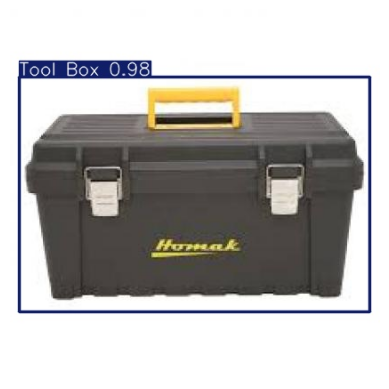

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Choose an example output image from the results
output_dir = 'runs/detect/train2'
example_image = os.path.join(output_dir, os.listdir(output_dir)[0])  # Selecting the first image for display

# Display the example image
image = Image.open(example_image)
plt.imshow(image)
plt.axis('off')
plt.show()
